In [1]:
import pandas as pd

df = pd.read_csv('./datasets/pima_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df[['Pregnancies', 'Outcome']].groupby(['Pregnancies'], as_index=False).mean().sort_values(by='Pregnancies', ascending=True)

,Pregnancies,Outcome
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


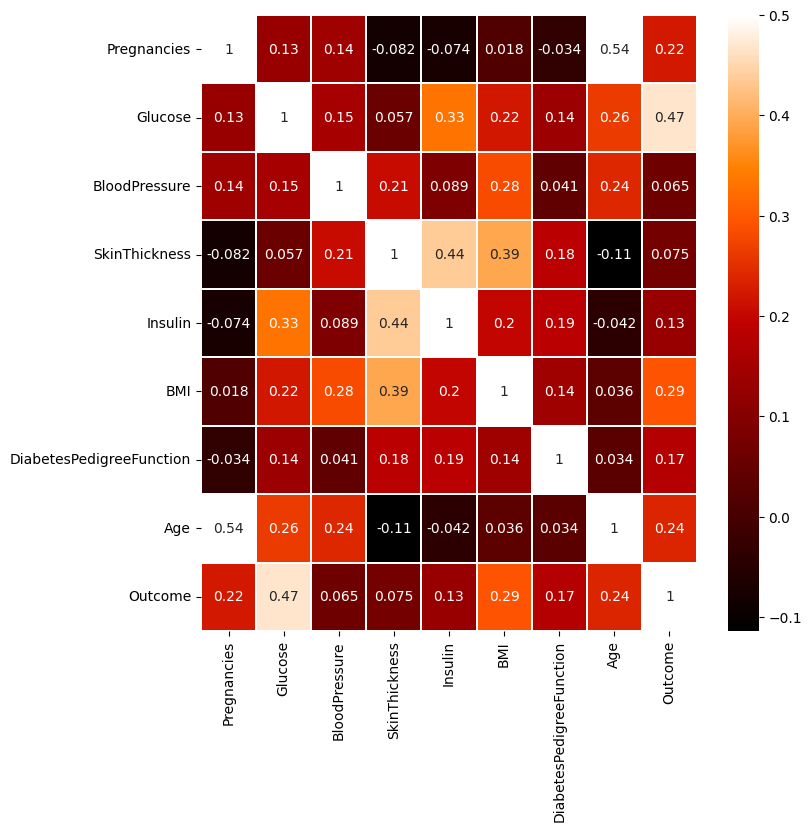

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.gist_heat
plt.figure(figsize=(8,8))
# 그래프 속성결정
sns.heatmap(df.corr(),linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white',annot=True)
plt.show()


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


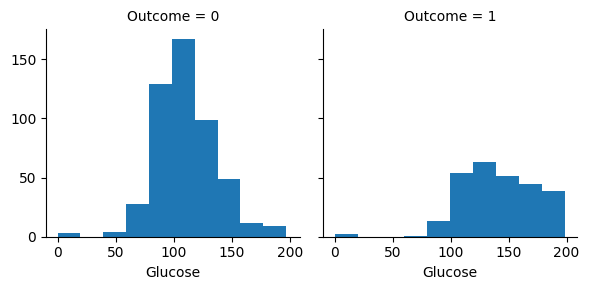

In [10]:
grid = sns.FacetGrid(df,col='Outcome')
grid.map(plt.hist,'Glucose',bins=10)
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
# 고정
tf.random.set_seed(3)
# X,y
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]
#모델
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# fit
model.fit(X,y, epochs=200, batch_size=10)
# result
print(f'Accuracy: {model.evaluate(X,y)[1]}')

Epoch 1/200
77/77 [==============================] - 2s 4ms/step - loss: 5.5445 - accuracy: 0.4974
Epoch 2/200
77/77 [==============================] - 0s 4ms/step - loss: 1.7447 - accuracy: 0.4557
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 1.2110 - accuracy: 0.4857
Epoch 4/200
77/77 [==============================] - 0s 4ms/step - loss: 1.0217 - accuracy: 0.5065
Epoch 5/200
77/77 [==============================] - 0s 4ms/step - loss: 0.8932 - accuracy: 0.5417
Epoch 6/200
77/77 [==============================] - 0s 3ms/step - loss: 0.8036 - accuracy: 0.5586
Epoch 7/200
77/77 [==============================] - 0s 4ms/step - loss: 0.7160 - accuracy: 0.5885
Epoch 8/200
77/77 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.6133
Epoch 9/200
77/77 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6263
Epoch 10/200
77/77 [==============================] - 0s 4ms/step - loss: 0.6431 - accuracy: 0.6497
Epoch 11/